In [74]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import lognorm, kstest
import seaborn as sns



data = pd.read_csv("../Data/career_filtered.csv")
data1 = pd.read_csv("../Data/data_combined.csv")

In [94]:
data

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
0,949,2003-04,0,1610612737,ATL,27.0,53,53,1955.0,383,...,0.880,141.0,354.0,495.0,127,44.0,19.0,131.0,147,1065
1,949,2003-04,0,1610612757,POR,27.0,32,3,729.0,118,...,0.832,48.0,96.0,144.0,47,24.0,18.0,53.0,75,319
2,949,2003-04,0,0,TOT,27.0,85,56,2684.0,501,...,0.869,189.0,450.0,639.0,174,68.0,37.0,184.0,222,1384
3,949,2004-05,0,1610612757,POR,28.0,54,49,1868.0,337,...,0.866,123.0,269.0,392.0,111,49.0,26.0,117.0,150,909
4,949,2005-06,0,1610612758,SAC,29.0,72,30,1961.0,332,...,0.784,106.0,251.0,357.0,149,48.0,42.0,108.0,227,887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12406,1626161,2019-20,0,0,TOT,26.0,54,39,1097.0,175,...,0.606,84.0,231.0,315.0,70,49.0,61.0,40.0,121,390
12407,1626161,2020-21,0,1610612742,DAL,27.0,53,16,906.0,115,...,0.628,66.0,170.0,236.0,35,21.0,43.0,29.0,129,280
12408,1626161,2021-22,0,1610612742,DAL,28.0,18,2,177.0,16,...,0.500,13.0,25.0,38.0,9,6.0,3.0,7.0,17,34
12409,1626161,2021-22,0,1610612755,PHI,28.0,2,0,6.0,0,...,0.000,0.0,2.0,2.0,1,0.0,0.0,0.0,2,0


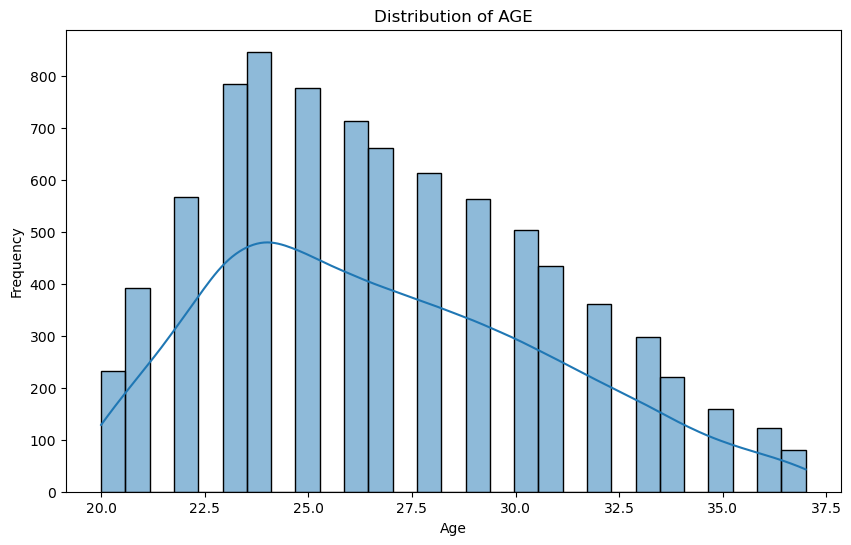

In [78]:
# Plotting the distribution of the 'AGE' column
plt.figure(figsize=(10, 6))
sns.histplot(data1['AGE'], kde=True)
plt.title('Distribution of AGE')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()




In [77]:
stats.kstest(data1['AGE'], 'norm', args=(data1['AGE'].mean(), data1['AGE'].std()))


KstestResult(statistic=0.10613105911935206, pvalue=4.4474803687505536e-82, statistic_location=25.0, statistic_sign=1)

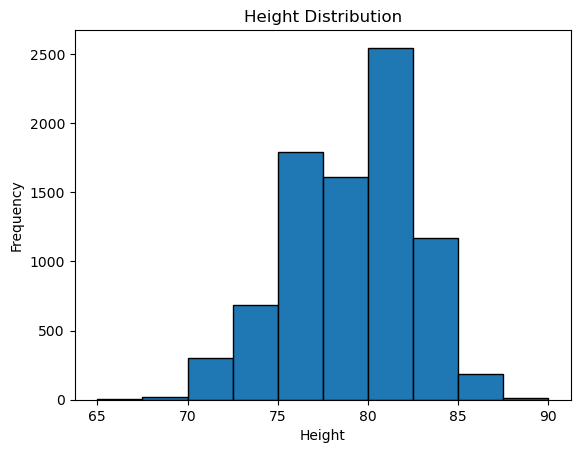

In [79]:
plt.hist(data1['PLAYER_HEIGHT_INCHES'], bins=10, edgecolor='black')
plt.title('Height Distribution')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

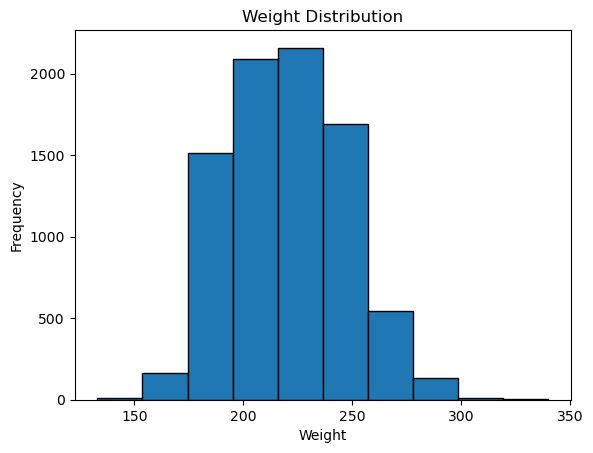

In [62]:
plt.hist(data1['PLAYER_WEIGHT'], bins=10, edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

## Players after 30 years score less ##

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     41.35
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           1.51e-10
Time:                        19:45:48   Log-Likelihood:                -19082.
No. Observations:                2576   AIC:                         3.817e+04
Df Residuals:                    2574   BIC:                         3.818e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1175.0585    119.256      9.853      0.0

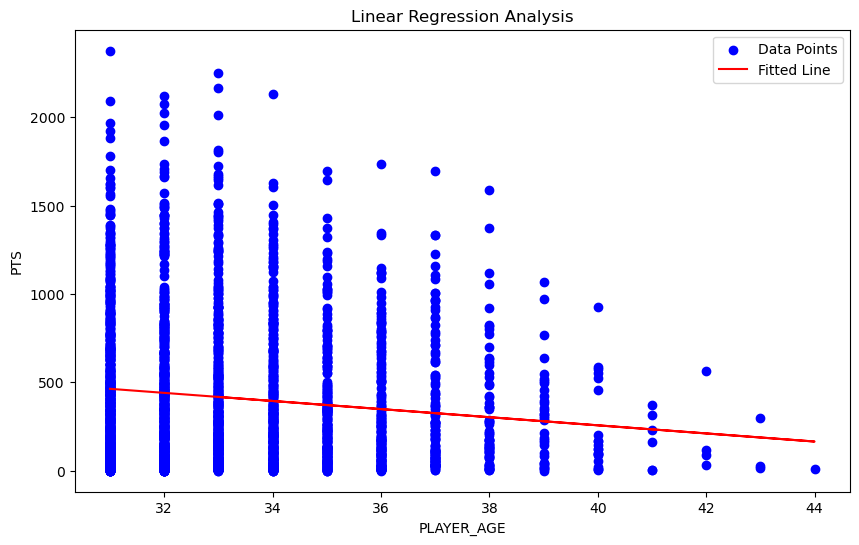

In [103]:
data_filtered = data[data['PLAYER_AGE'] > 30]
target = 'PTS'
input_var = 'PLAYER_AGE'

# Define the variables
x = data_filtered[input_var]
y = data_filtered[target]

# Add constant to predictor variables (i.e. the intercept)
x = sm.add_constant(x)

# Fit linear regression model
model_pts = sm.OLS(y, x).fit()

# View model summary
print(model_pts.summary())

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered[input_var], data_filtered[target], color='blue', label='Data Points')
plt.plot(data_filtered[input_var], model_pts.fittedvalues, color='red', label='Fitted Line')
plt.title('Linear Regression Analysis')
plt.xlabel(input_var)
plt.ylabel(target)
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    MIN   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     26.69
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.58e-07
Time:                        19:50:56   Log-Likelihood:                -20860.
No. Observations:                2576   AIC:                         4.172e+04
Df Residuals:                    2574   BIC:                         4.174e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2268.8477    237.826      9.540      0.0

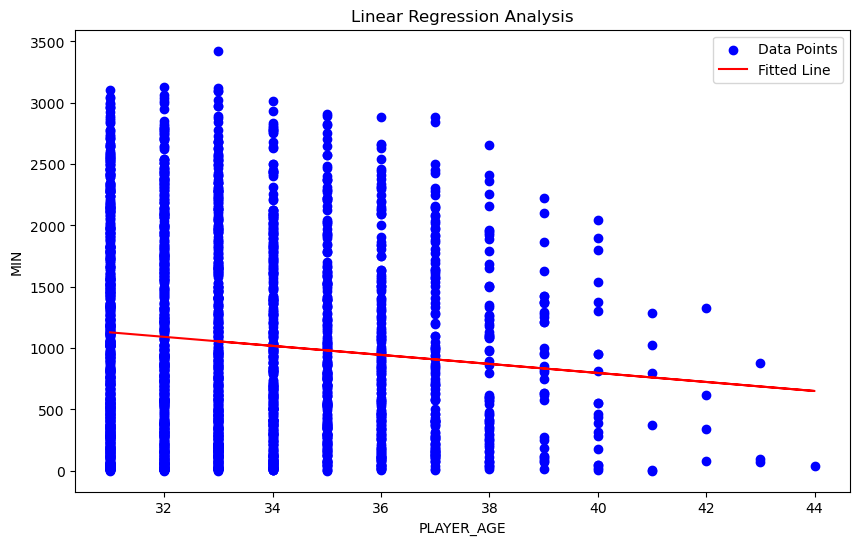

In [105]:
data_filtered = data[data['PLAYER_AGE'] > 30]
target = 'MIN'
input_var = 'PLAYER_AGE'

# Define the variables
x = data_filtered[input_var]
y = data_filtered[target]

# Add constant to predictor variables (i.e. the intercept)
x = sm.add_constant(x)

# Fit linear regression model
model_pts = sm.OLS(y, x).fit()

# View model summary
print(model_pts.summary())
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered[input_var], data_filtered[target], color='blue', label='Data Points')
plt.plot(data_filtered[input_var], model_pts.fittedvalues, color='red', label='Fitted Line')
plt.title('Linear Regression Analysis')
plt.xlabel(input_var)
plt.ylabel(target)
plt.legend()
plt.show()

                            OLS Regression Results                            
Dep. Variable:                     GP   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.301
Date:                Sun, 03 Dec 2023   Prob (F-statistic):            0.00400
Time:                        19:52:26   Log-Likelihood:                -11883.
No. Observations:                2576   AIC:                         2.377e+04
Df Residuals:                    2574   BIC:                         2.378e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.5806      7.291      9.132      0.0

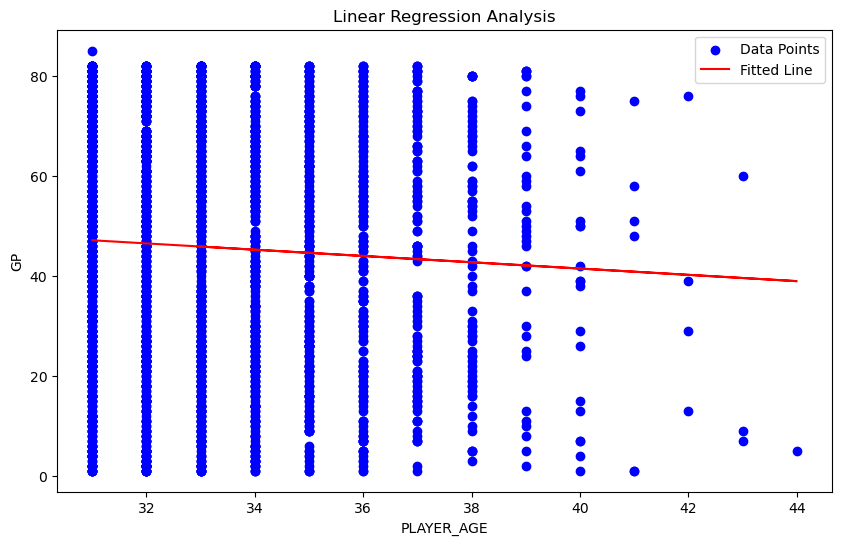

In [108]:
data_filtered = data[data['PLAYER_AGE'] > 30]
target = 'GP'
input_var = 'PLAYER_AGE'

# Define the variables
x = data_filtered[input_var]
y = data_filtered[target]

# Add constant to predictor variables (i.e. the intercept)
x = sm.add_constant(x)

# Fit linear regression model
model_pts = sm.OLS(y, x).fit()

# View model summary
print(model_pts.summary())
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(data_filtered[input_var], data_filtered[target], color='blue', label='Data Points')
plt.plot(data_filtered[input_var], model_pts.fittedvalues, color='red', label='Fitted Line')
plt.title('Linear Regression Analysis')
plt.xlabel(input_var)
plt.ylabel(target)
plt.legend()
plt.show()

In [71]:
target = 'PTS'
input_var = ['GP', 'GS']

# Define the variables
x = data[input_var]
y = data[target]

# Add constant to predictor variables (i.e. the intercept)
x = sm.add_constant(x)

# Fit linear regression model
model_pts = sm.OLS(y, x).fit()

# View model summary
print(model_pts.summary())

                            OLS Regression Results                            
Dep. Variable:                    PTS   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                 1.865e+04
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:59:14   Log-Likelihood:                -84676.
No. Observations:               12411   AIC:                         1.694e+05
Df Residuals:                   12408   BIC:                         1.694e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -49.6212      4.085    -12.146      0.0

In [90]:
# Get the coefficients and R2 as variables
print("Parameters: ", model_pts.params)
print("R2 =", model_pts.rsquared)

Parameters:  const                          -49.621218
Difference between GP and GS     6.270020
GS                              16.001333
dtype: float64
R2 = 0.7503528756156382


Text(400.7790404040403, 0.5, 'Standard residuals')

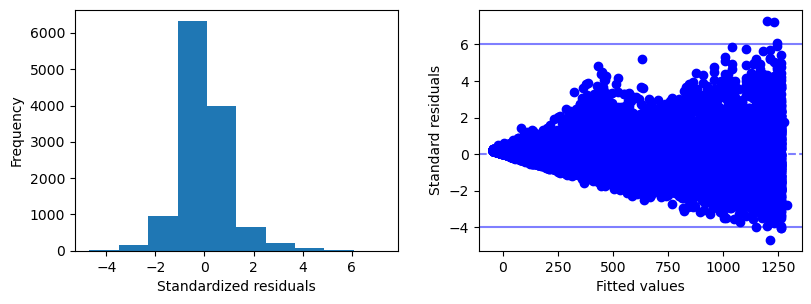

In [73]:
# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(8, 3)) # two panels 
fig.tight_layout()                            # adjust distance between panels
fig.subplots_adjust(wspace=0.25)              # horizontal separation of panels

# Plot histogram of residuals
axs[0].hist(model_pts.resid_pearson)
axs[0].set_xlabel('Standardized residuals')
axs[0].set_ylabel('Frequency')

# Plot residuals against fitted values
axs[1].plot(model_pts.fittedvalues, model_pts.resid_pearson, 'o', color='b')
axs[1].axhline(-4, color='b', alpha=0.5)
axs[1].axhline(6, color='b', alpha=0.5)
axs[1].axhline(0, linestyle='--', color='b', alpha=0.5)
axs[1].set_xlabel('Fitted values')
axs[1].set_ylabel('Standard residuals')

In [74]:
print("\033[1m" + "Player ID\tSeason ID\tTeam ID\t\tResiduals\t\tTarget" + "\033[0m")

for index, row in data.iterrows():
    if model_pts.resid_pearson[index] > 6 or model_pts.resid_pearson[index] < -4:
        print('%s\t\t%s\t\t%s\t%s\t%s' % (row['PLAYER_ID'], 
                                      row['SEASON_ID'], 
                                      row['TEAM_ID'],
                                      str(model_pts.resid_pearson[index]),
                                      str(row[target])))





Player ID	Season ID	Team ID		Residuals		Target
2586		2010-11		1610612741	-4.0649556978556545	359
201935		2018-19		1610612745	7.286500036435156	2818
101236		2009-10		1610612745	-4.069454878096405	358
977		2005-06		1610612747	7.2055027986637805	2832
2215		2006-07		1610612751	-4.688248320146887	169
201142		2013-14		1610612760	6.058205840553316	2593


In [75]:
data[input_var].corr()


,GP,GS
GP,1.000000,0.647167
GS,0.647167,1.000000


In [98]:
# AST ~ GP + GS
target = 'AST'
input_var = ['GP', 'GS']


# Define the variables
x = data[input_var]
y = data[target]

# Add constant to predictor variables (i.e. the intercept)
x = sm.add_constant(x)

# Fit linear regression model
model_ast = sm.OLS(y, x).fit()
# View model summary
print(model_ast.summary())


                            OLS Regression Results                            
Dep. Variable:                    AST   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.485
Method:                 Least Squares   F-statistic:                     5853.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:42:54   Log-Likelihood:                -73031.
No. Observations:               12411   AIC:                         1.461e+05
Df Residuals:                   12408   BIC:                         1.461e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -8.0060      1.598     -5.008      0.0

In [99]:
# Get the coefficients and R2 as variables
print("Parameters: ", model_ast.params)
print("R2 =", model_ast.rsquared)

Parameters:  const   -8.006028
GP       1.267102
GS       2.226870
dtype: float64
R2 = 0.48544941959630894


Text(400.7790404040403, 0.5, 'Standard residuals')

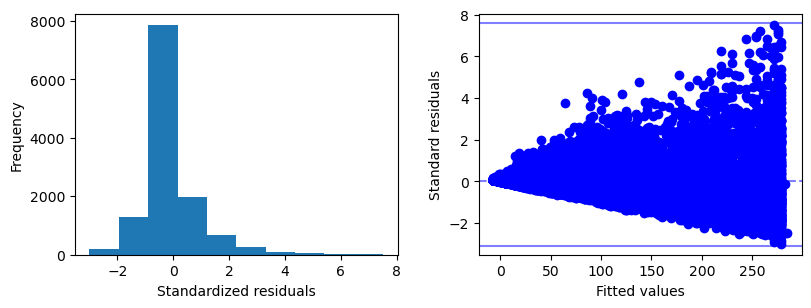

In [107]:
# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(8, 3)) # two panels 
fig.tight_layout()                            # adjust distance between panels
fig.subplots_adjust(wspace=0.25)              # horizontal separation of panels

# Plot histogram of residuals
axs[0].hist(model_ast.resid_pearson)
axs[0].set_xlabel('Standardized residuals')
axs[0].set_ylabel('Frequency')

# Plot residuals against fitted values
axs[1].plot(model_ast.fittedvalues, model_ast.resid_pearson, 'o', color='b')
axs[1].axhline(-3.1, color='b', alpha=0.5)
axs[1].axhline(7.6, color='b', alpha=0.5)
axs[1].axhline(0, linestyle='--', color='b', alpha=0.5)
axs[1].set_xlabel('Fitted values')
axs[1].set_ylabel('Standard residuals')

In [106]:
print("\033[1m" + "Player ID\tSeason ID\tTeam ID\t\tResiduals\t\tTarget" + "\033[0m")

for index, row in data.iterrows():
    if model_ast.resid_pearson[index] > 7.5 or model_ast.resid_pearson[index] < -3.1:
        print('%s\t\t%s\t\t%s\t%s\t%s' % (row['PLAYER_ID'], 
                                      row['SEASON_ID'], 
                                      row['TEAM_ID'],
                                      str(model_ast.resid_pearson[index]),
                                      str(row[target])))

Player ID	Season ID	Team ID		Residuals		Target
101108		2007-08		1610612740	7.51424988998638	925


In [109]:
# REB ~ GP + GS
target = 'REB'
input_var = ['GP', 'GS']


# Define the variables
x = data[input_var]
y = data[target]

# Add constant to predictor variables (i.e. the intercept)
x = sm.add_constant(x)

# Fit linear regression model
model_reb = sm.OLS(y, x).fit()
# View model summary
print(model_reb.summary())


                            OLS Regression Results                            
Dep. Variable:                    REB   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                 1.227e+04
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:47:07   Log-Likelihood:                -75516.
No. Observations:               12411   AIC:                         1.510e+05
Df Residuals:                   12408   BIC:                         1.511e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.2284      1.953     -9.334      0.0

In [110]:
# Get the coefficients and R2 as variables
print("Parameters: ", model_reb.params)
print("R2 =", model_reb.rsquared)

Parameters:  const   -18.228434
GP        2.877370
GS        3.367997
dtype: float64
R2 = 0.6641622653792396


Text(400.7790404040403, 0.5, 'Standard residuals')

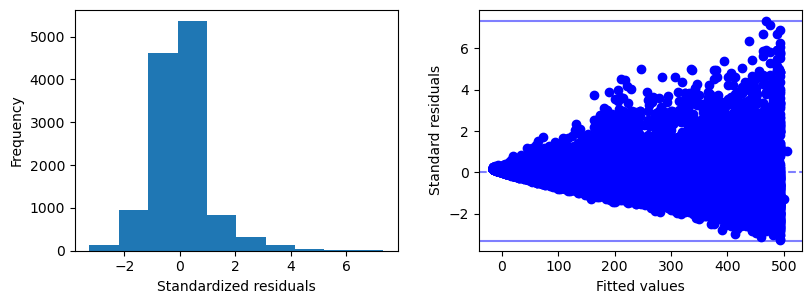

In [114]:
# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(8, 3)) # two panels 
fig.tight_layout()                            # adjust distance between panels
fig.subplots_adjust(wspace=0.25)              # horizontal separation of panels

# Plot histogram of residuals
axs[0].hist(model_reb.resid_pearson)
axs[0].set_xlabel('Standardized residuals')
axs[0].set_ylabel('Frequency')

# Plot residuals against fitted values
axs[1].plot(model_reb.fittedvalues, model_reb.resid_pearson, 'o', color='b')
axs[1].axhline(-3.3, color='b', alpha=0.5)
axs[1].axhline(7.3, color='b', alpha=0.5)
axs[1].axhline(0, linestyle='--', color='b', alpha=0.5)
axs[1].set_xlabel('Fitted values')
axs[1].set_ylabel('Standard residuals')

In [115]:
print("\033[1m" + "Player ID\tSeason ID\tTeam ID\t\tResiduals\t\tTarget" + "\033[0m")

for index, row in data.iterrows():
    if model_reb.resid_pearson[index] > 7.3 or model_reb.resid_pearson[index] < -3.3:
        print('%s\t\t%s\t\t%s\t%s\t%s' % (row['PLAYER_ID'], 
                                      row['SEASON_ID'], 
                                      row['TEAM_ID'],
                                      str(model_reb.resid_pearson[index]),
                                      str(row[target])))

Player ID	Season ID	Team ID		Residuals		Target
203083		2017-18		1610612765	7.323157606753264	1247.0


In [115]:
data1

,PLAYER_ID,SEASON_ID,AGE,PLAYER_HEIGHT_INCHES,PLAYER_WEIGHT,OREB_PCT,DREB_PCT,TS_PCT,MIN,FGA_PM,FG_PCT,FG3A_PM,FG3_PCT,FTM_PM,BLK_PM,PF_PM
0,1630639,2022-23,22.0,78.0,179.0,0.046,0.152,0.589,217.0,0.405530,0.662667,0.230415,0.266667,0.018433,0.000000,0.101382
1,1631260,2022-23,23.0,77.0,190.0,0.016,0.105,0.607,345.0,0.362319,0.424000,0.304348,0.419000,0.011594,0.000000,0.089855
2,203932,2022-23,27.0,80.0,235.0,0.086,0.136,0.617,2055.0,0.370316,0.564000,0.084185,0.347000,0.092944,0.024818,0.062774
3,1628988,2022-23,26.0,72.0,185.0,0.028,0.059,0.528,845.0,0.260355,0.418000,0.104142,0.409000,0.031953,0.014201,0.093491
4,1630174,2022-23,23.0,77.0,215.0,0.033,0.119,0.566,1816.0,0.324890,0.427000,0.172907,0.366000,0.065529,0.018722,0.129405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8317,1626195,2019-20,26.0,83.0,250.0,0.105,0.243,0.576,375.0,0.370667,0.532000,0.058667,0.227000,0.098667,0.018667,0.085333
8318,201163,2019-20,33.0,80.0,235.0,0.014,0.164,0.531,734.0,0.249319,0.404000,0.164850,0.306000,0.027248,0.016349,0.107629
8319,1627812,2019-20,27.0,72.0,178.0,0.011,0.085,0.528,530.0,0.354717,0.420000,0.149057,0.304000,0.067925,0.007547,0.071698
8320,1628380,2019-20,22.0,83.0,250.0,0.095,0.149,0.538,290.0,0.234483,0.471000,0.065517,0.368000,0.020690,0.017241,0.124138


In [121]:
# REB ~ GP + GS
data1['TS_PCT in percentage'] = data1['TS_PCT']*100
target = 'TS_PCT in percentage'
input_var = ['PLAYER_HEIGHT_INCHES', 'PLAYER_WEIGHT']


# Define the variables
x = data1[input_var]
y = data1[target]

# Add constant to predictor variables (i.e. the intercept)
x = sm.add_constant(x)

# Fit linear regression model
model = sm.OLS(y, x).fit()
# View model summary
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     TS_PCT in percentage   R-squared:                       0.034
Model:                              OLS   Adj. R-squared:                  0.034
Method:                   Least Squares   F-statistic:                     145.4
Date:                  Sun, 03 Dec 2023   Prob (F-statistic):           8.23e-63
Time:                          21:15:13   Log-Likelihood:                -26639.
No. Observations:                  8322   AIC:                         5.328e+04
Df Residuals:                      8319   BIC:                         5.330e+04
Df Model:                             2                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const       

Text(400.7790404040403, 0.5, 'Standard residuals')

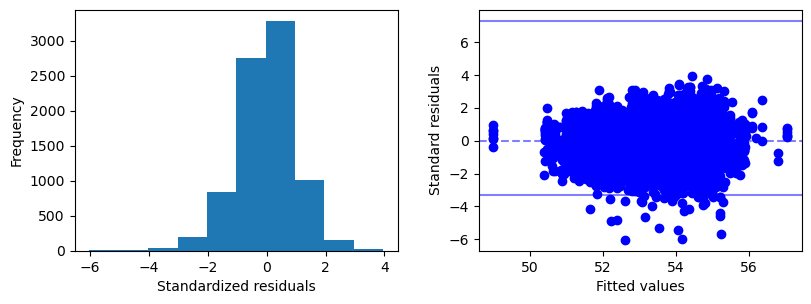

In [123]:
# Plot settings
fig, axs = plt.subplots(1, 2, figsize=(8, 3)) # two panels 
fig.tight_layout()                            # adjust distance between panels
fig.subplots_adjust(wspace=0.25)              # horizontal separation of panels

# Plot histogram of residuals
axs[0].hist(model.resid_pearson)
axs[0].set_xlabel('Standardized residuals')
axs[0].set_ylabel('Frequency')

# Plot residuals against fitted values
axs[1].plot(model.fittedvalues, model.resid_pearson, 'o', color='b')
axs[1].axhline(-3.3, color='b', alpha=0.5)
axs[1].axhline(7.3, color='b', alpha=0.5)
axs[1].axhline(0, linestyle='--', color='b', alpha=0.5)
axs[1].set_xlabel('Fitted values')
axs[1].set_ylabel('Standard residuals')